In [1]:
import os
current_directory = os.getcwd()
print(f"Current Working Directory: {current_directory}")

from Tusc5ImageUtils import *
import numpy as np
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import matplotlib as mpl
from skimage import exposure
mpl.rcParams['figure.dpi'] = 300
from cellpose import utils, io, plot, models
from scipy.ndimage import binary_erosion, binary_fill_holes, center_of_mass
import subprocess
import pandas as pd
import nd2
from skimage.measure import regionprops

Current Working Directory: /Users/raphaeltinio/Lab Analysis MAC/ImageAnalysis


In [2]:
### Directory Configuration ###

parent_directory = os.path.dirname(current_directory) # Parent directory
test_stacks_directory = os.path.join(parent_directory, 'Test Stacks')

model_path_dapi = os.path.join(parent_directory, 'ImageAnalysis/cellpose_models/T5_DAPI_V1')
img_path = os.path.join(test_stacks_directory, '2007R_GLUT1_647_WGA_594_0002.nd2')

In [5]:
### Image Insertion ###

f = nd2.ND2File(img_path)
image = f.asarray()

DAPI_stack = to_8bit(image[:,0,:,:].copy())
eGFP_stack = to_8bit(image[:,1,:,:].copy())
WGA_stack = to_8bit(image[:,2,:,:].copy())

mp_DAPI = max_proj(DAPI_stack)
model = models.CellposeModel(pretrained_model=model_path_dapi)
DAPI_masks, flows, styles = model.eval(mp_DAPI, diameter=None, channels=[0,0])

/var/folders/sl/syqsj8q94yn7kbv8l50mtwdw0000gn/T/ipykernel_38721/87014615.py:3: UserWarning: ND2File file not closed before garbage collection. Please use `with ND2File(...):` context or call `.close()`.
  f = nd2.ND2File(img_path)


/Users/raphaeltinio/opt/anaconda3/lib/python3.9/site-packages/scipy/ndimage/_measurements.py:1535: RuntimeWarning: invalid value encountered in scalar divide
  results = [sum(input * grids[dir].astype(float), labels, index) / normalizer


(-0.5, 1023.5, 1023.5, -0.5)

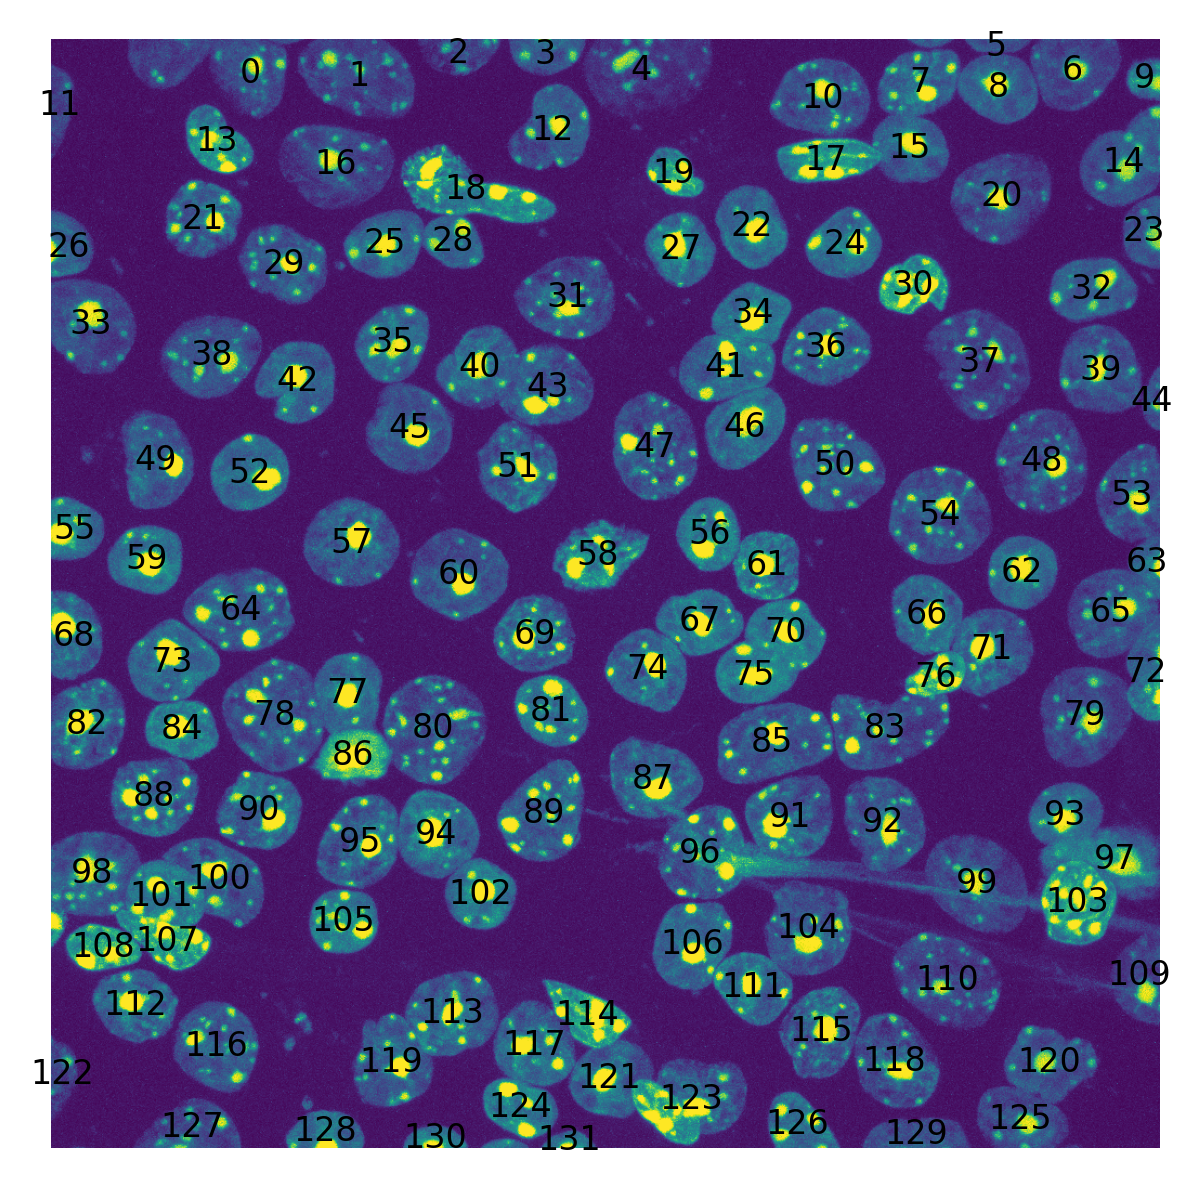

In [12]:
DAPI_coords = get_nuclei_position(DAPI_masks)
plt.imshow(mp_DAPI)
plot_maskids(DAPI_coords, text_color = 'black', font_size= 8)
plt.axis('off')

In [13]:
WGA_stitcher(DAPI_stack, WGA_stack, DAPI_masks, .15)
plot_maskids(DAPI_coords)

NameError: name 'WGA_stitcher' is not defined